# **Import necessary libraries and Load data from database**

In [1]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='ecc_eda_log.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('FILE STARTS RUNNING!')

INFO:root:FILE STARTS RUNNING!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pymongo import MongoClient

import warnings
warnings.filterwarnings('ignore')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
logger.info('Libraries imported!')
logger.info('Connecting to database...')

INFO:root:Libraries imported!
INFO:root:Connecting to database...


In [4]:
# Connect to Mongodb cluster
client = MongoClient("mongodb+srv://<username>:<password>@mycluster.g3bp8fr.mongodb.net/?retryWrites=true&w=majority")

logger.info('Connected to database!')

# List of databases
db_list = client.list_database_names()
db_list

INFO:root:Connected to database!


['CHURN', 'loan_db', 'admin', 'local']

In [5]:
db = client.CHURN

In [6]:
cursor = db.ecomm_churn.find()

df = pd.DataFrame(list(cursor)).drop('_id', axis=1)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile,3,6.0,DC,Female,3.0,3,Laptop,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,10.0,Mobile,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,10.0,Mobile,1,30.0,DC,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile,3,15.0,DC,Male,2.0,4,Laptop,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [7]:
logger.info('Loaded data from database!')

INFO:root:Loaded data from database!


In [8]:
df.shape

(5630, 20)

# **Exploratory Data Analysis**

In [9]:
logger.info('Data exploration starts!')

INFO:root:Data exploration starts!


## **Basic Analysis**

In [10]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.180995,1.654707,15.620426,2.934636,3.688988,3.066785,4.214032,0.284902,15.721670,1.716874,2.961812,4.459325,177.223030
std,1625.385339,0.374240,8.354261,0.915389,8.075961,0.705528,1.023999,1.380194,2.583586,0.451408,3.588459,1.857640,2.879248,3.570626,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [11]:
def unique_list():
  unique = []
  for col in df.columns:
    if col in ['CustomerID', 'CashbackAmount']:
      unique.append('Number of values too long for dataframe!')
    else:
      unique.append(df[col].unique())
  return unique

In [12]:
basic_info = pd.DataFrame({'Columns' : df.columns,
                           'Data Type' : df.dtypes.values,
                           'No. of unique values' : df.nunique().values,
                           'Unique values' : unique_list()})
basic_info

,Columns,Data Type,No. of unique values,Unique values
0,CustomerID,int64,5630,Number of values too long for dataframe!
1,Churn,int64,2,"[1, 0]"
2,Tenure,float64,36,"[4.0, 10.0, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, ..."
3,PreferredLoginDevice,object,2,"[Mobile, Computer]"
4,CityTier,int64,3,"[3, 1, 2]"
5,WarehouseToHome,float64,32,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
6,PreferredPaymentMode,object,5,"[DC, UPI, CC, COD, E wallet]"
7,Gender,object,2,"[Female, Male]"
8,HourSpendOnApp,float64,6,"[3.0, 2.0, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,int64,6,"[3, 4, 5, 2, 1, 6]"


**OBSERVATION** :
- We have a total of 5630 customers information
- Numeric features : 13 (exclusing CustomerID and Churn), out of which 3 of them are categorical data
- String type features : 5

So we might have a total of 10 numeric and 8 categorical input features.
Lets explore them one by one.

## **Distribution of dependent variable : 'Churn'**

In [13]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manage

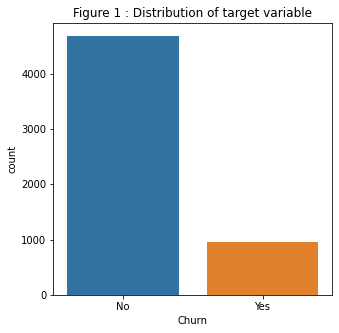

In [14]:
x_labels= ['No', 'Yes']

fig,ax = plt.subplots(figsize=(5,5))
ax=sns.countplot(x='Churn', data=df)
ax.set_xticklabels(x_labels)
plt.title('Figure 1 : Distribution of target variable')
plt.show()

We can see that this is a highly imbalanced dataset

## **Numeric Features**

### **Functions**

In [15]:
# Function to plot the distribution of numerical variable
def plot_num_var(var_name, var_label, bin_num, fig_num):
  plt.figure(figsize = (25,5))
  plt.suptitle('Figure {} : Distribution of {}'.format(fig_num,var_name))

  plt.subplot(1,2,1)
  sns.histplot(data=df, x=var_name, bins=bin_num)
  plt.title('Fig {}(a)'.format(fig_num))
  plt.xlabel(var_name)
  plt.ylabel('Count')

  plt.subplot(1,2,2)
  sns.boxplot(data=df, x=var_name)
  plt.title('Fig {}(b)'.format(fig_num))
  plt.xlabel(var_name)
  
  plt.show()

In [16]:
# Function to plot the distribution of numerical variable by Churn value
def plot_numvar_creditrisk(var_name, var_label, bin_num, fig_num):
  plt.figure(figsize = (25,5))
  plt.suptitle('Figure {} : Distribution of {} by Churn value'.format(fig_num,var_label))

  plt.subplot(1,2,1)
  sns.histplot(data=df, x=var_name, hue='Churn', bins=bin_num)
  plt.title('Fig {}(a)'.format(fig_num))
  plt.xlabel(var_label)
  plt.ylabel('Count')
  
  plt.subplot(1,2,2)
  sns.boxplot(data=df, x='Churn', y=var_name)
  plt.title('Fig {}(b)'.format(fig_num))
  plt.xlabel('Churn value')
  
  plt.show()

### **Tenure of customer in organization : 'Tenure'**

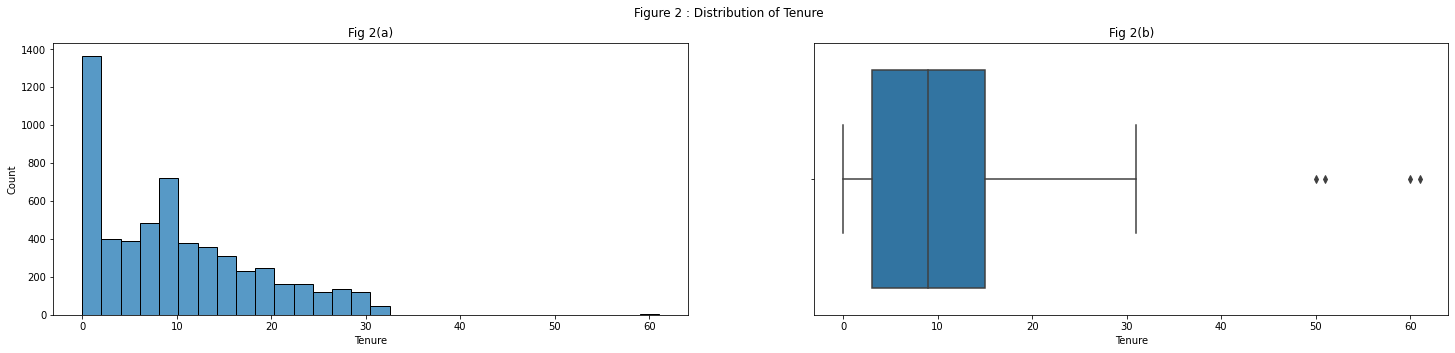

In [17]:
# Distribution of Tenure of the customers with the ecommerce platform
plot_num_var('Tenure', 'Churn', 30, 2)

In [18]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

pd.DataFrame(df['Tenure'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Tenure,5630.0,10.180995,8.354261,0.0,1.0,1.0,3.0,4.0,7.0,9.0,11.0,14.0,15.0,17.0,23.0,30.0,61.0


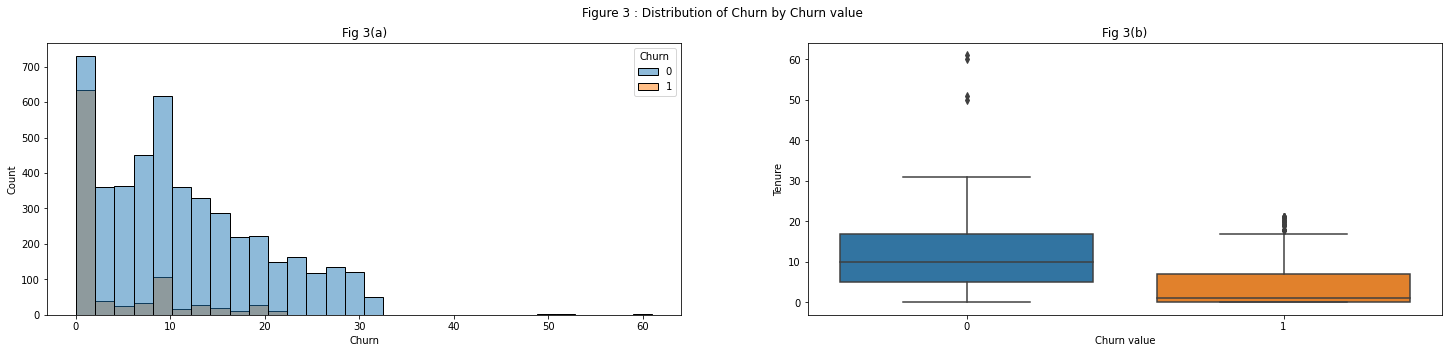

In [19]:
# Distribution of Tenure of customers by Churn value
plot_numvar_creditrisk('Tenure', 'Churn', 30, 3)

In [20]:
df.groupby('Churn')['Tenure'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,11.443614,8.258140,0.0,1.0,4.0,5.0,6.0,8.0,10.0,12.0,15.0,17.0,19.0,24.0,31.00,61.0
1,948.0,3.945148,5.563415,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,7.0,10.0,12.3,20.53,21.0


**OBSERVATION**:
- Most of the customers have a Tenure between 0 to 20 months.
- Is right skewed.
- The probability to churn is found to be higher for customers whose tenure is within 2 or 3 months (Fig 3(a)). Although this might not be the actual picture, as its not fair to come to a conclusion within just 2 months.
- Similarly, Fig 3(a) shows that as the tenure increases, the possibility of churning also decreases.
- A few outliers are observed after 50 months of Tenure (Fig 2(b))
- Fig 3(b) and the description table shows that 50 t0 60 % of customers who churned have tenure of 1 month
- Max tenure for churned customer is 21. Which means any customer whose tenure is greater than that (till 61 months) have not churned.

We might have to assume that Tenure is a good input feature for our model.

### **Distance in between warehouse to home of customer : 'WarehouseToHome'**

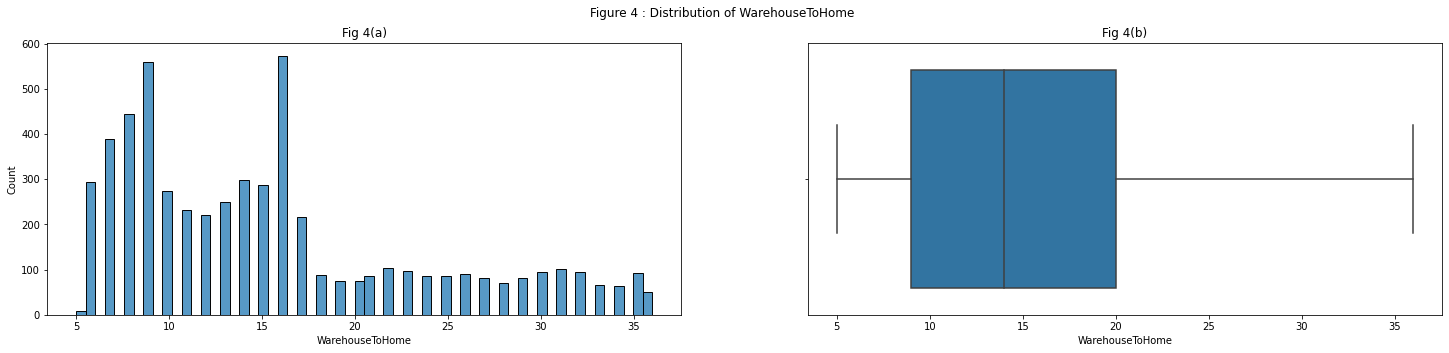

In [21]:
# Distribution of distance of the warehouse from the customers' houses
plot_num_var('WarehouseToHome', 'Churn', 60, 4)

In [22]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

pd.DataFrame(df['WarehouseToHome'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
WarehouseToHome,5630.0,15.620426,8.075961,5.0,7.0,8.0,9.0,9.0,12.0,14.0,16.0,17.0,20.0,23.0,29.1,35.0,36.0


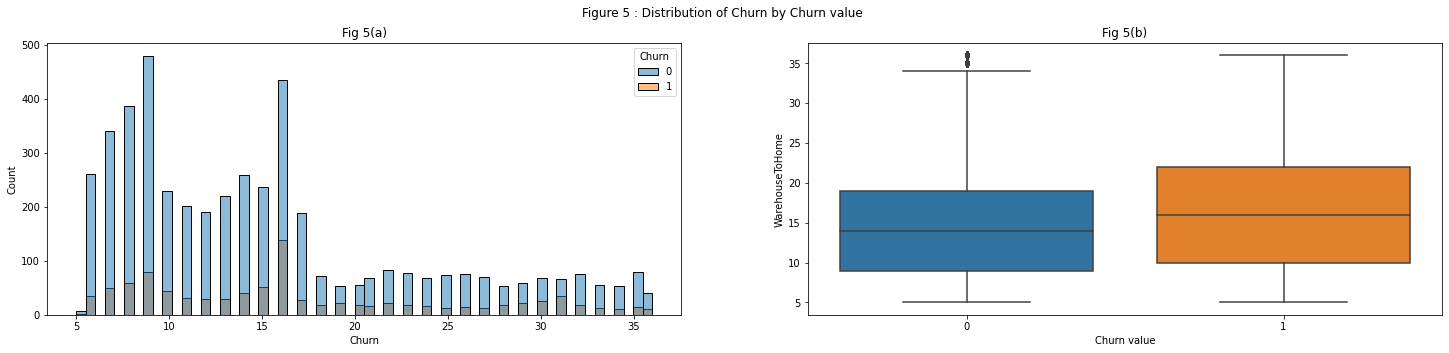

In [23]:
# Distribution of the distance of the warehouse from the customers' houses by Churn value
plot_numvar_creditrisk('WarehouseToHome', 'Churn', 60, 5)

In [24]:
df.groupby('Churn')['WarehouseToHome'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,15.334259,8.011739,5.0,7.0,8.0,9.0,9.0,11.0,14.0,15.6,17.0,19.0,22.0,29.0,35.00,36.0
1,948.0,17.033755,8.245758,5.0,8.0,9.0,10.0,11.0,14.0,16.0,16.0,20.0,22.0,25.6,31.0,35.53,36.0


**OBSERVATION**:
- Most of the customers have a distance between 5 to 20 kms to the warehouse from their home
- Right skewed.
- The ratio of customers who have churned to have not churned seems to be almost consistent with increasing distance
- The mean distance for customers have churned and not-churned do not show any significant difference

Therefore, we might have to assume that WarehouseToHome does not contribute much value for our model.

### **Percentage increases in order from last year : 'OrderAmountHikeFromlastYear'**

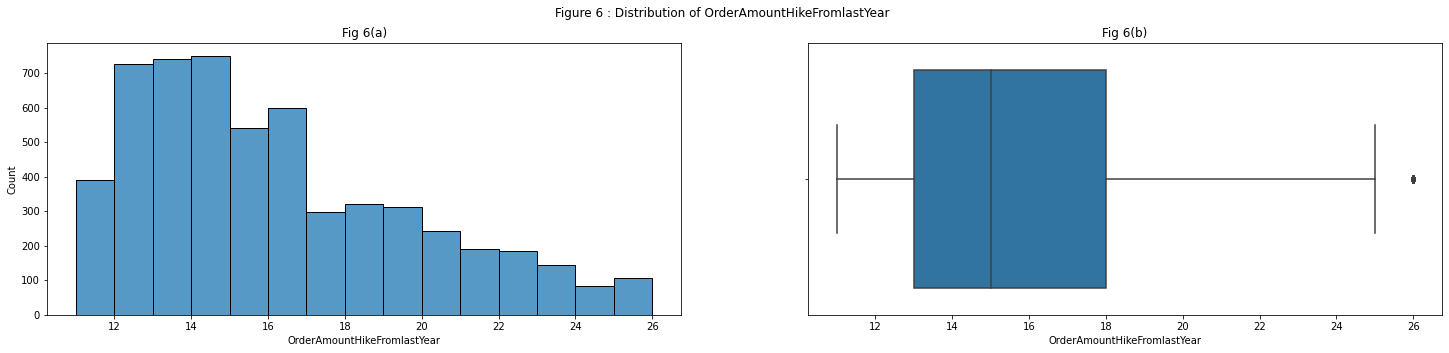

In [25]:
# Distribution of the percentage increase in order from last year
plot_num_var('OrderAmountHikeFromlastYear', 'Churn', 15, 6)

In [26]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

pd.DataFrame(df['OrderAmountHikeFromlastYear'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
OrderAmountHikeFromlastYear,5630.0,15.72167,3.588459,11.0,12.0,13.0,13.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,21.0,25.0,26.0


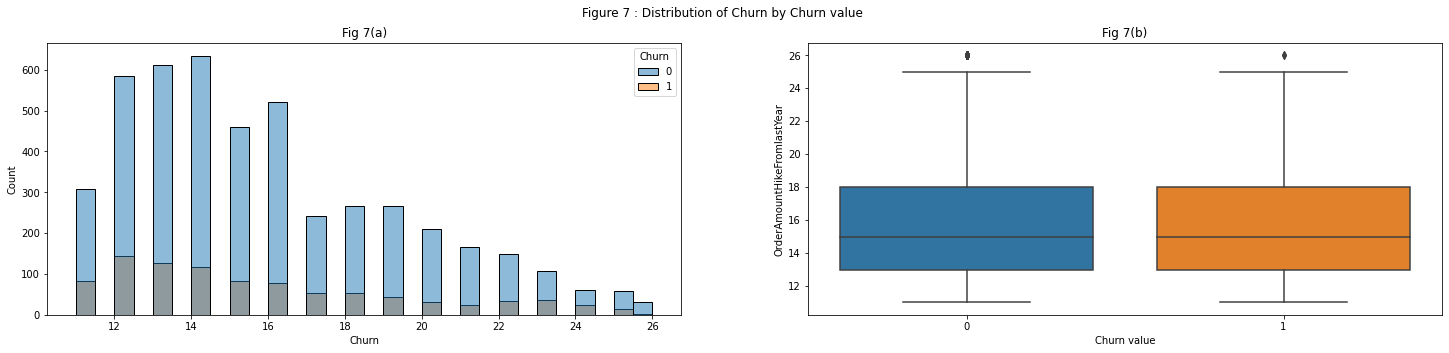

In [27]:
# Distribution of the percentage increase in order from last year by Churn value
plot_numvar_creditrisk('OrderAmountHikeFromlastYear', 'Churn', 30, 7)

In [28]:
df.groupby('Churn')['OrderAmountHikeFromlastYear'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,15.739641,3.547692,11.0,12.0,13.0,13.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,21.0,25.0,26.0
1,948.0,15.632911,3.784068,11.0,12.0,12.0,13.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,22.0,25.0,26.0


**OBSERVATION**:
- For most of the customers the % of increase in orders from last year has been between 12 to 17 %
- Is right skewed.
- The mean distance for customers have churned and not-churned do not show any significant difference

Therefore, we might have to assume that WarehouseToHome does not contribute much value for our model.

### **Total number of coupon has been used in last month : 'CouponUsed'**

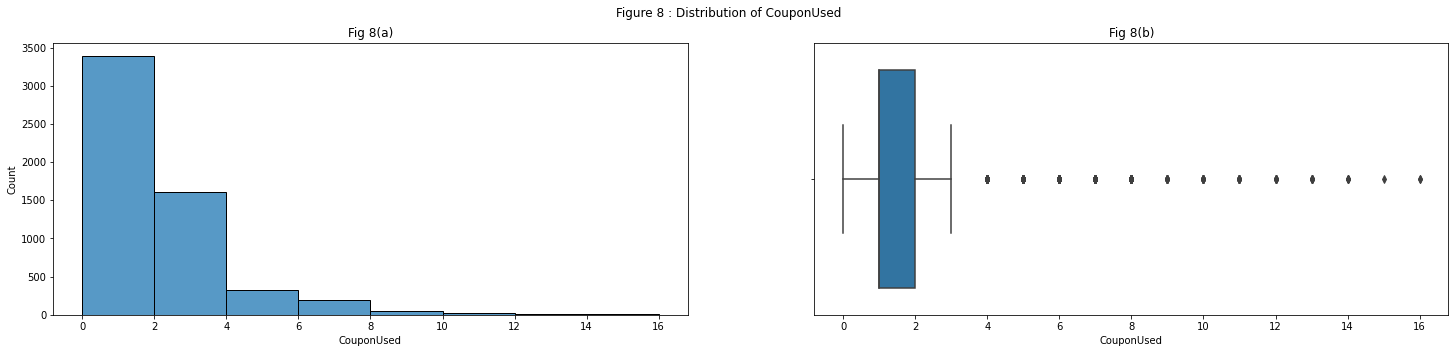

In [29]:
# Distribution of no. of cupons used by the customers in last month
plot_num_var('CouponUsed', 'Churn', 8, 8)

In [30]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

pd.DataFrame(df['CouponUsed'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
CouponUsed,5630.0,1.716874,1.85764,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,9.0,16.0


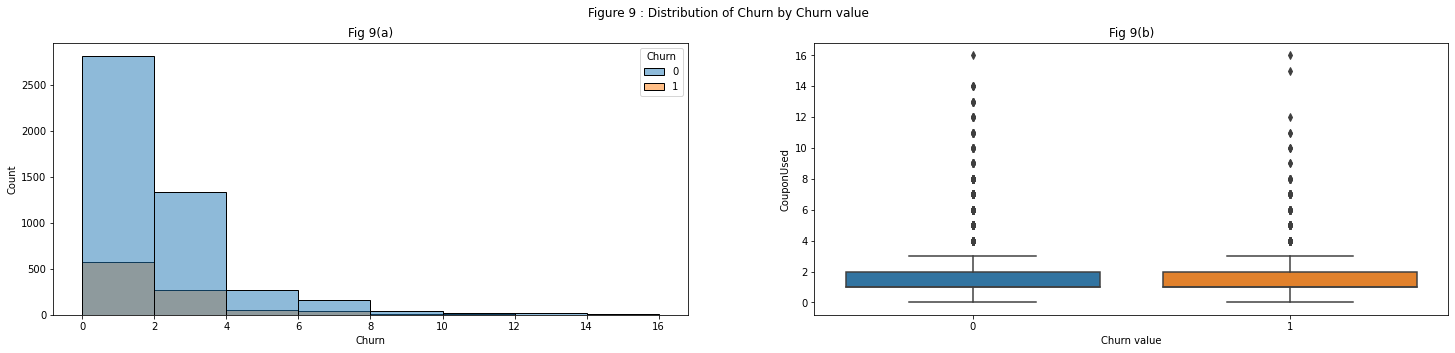

In [31]:
# Distribution of no. of cupons used by the customers in last month by Churn value
plot_numvar_creditrisk('CouponUsed', 'Churn', 8, 9)

In [32]:
df.groupby('Churn')['CouponUsed'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,1.718069,1.850065,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,9.00,16.0
1,948.0,1.710970,1.895586,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,8.53,16.0


**OBSERVATION**:
- For most of the customers have used 0 to 2 coupons in the last month.
- Is right skewed.
- The mean number of coupons used for customers have churned and not-churned do not show any significant difference

Therefore, we might have to assume that CouponUsed does not contribute much value for our model.

### **Total number of orders has been places in last month : 'OrderCount'**

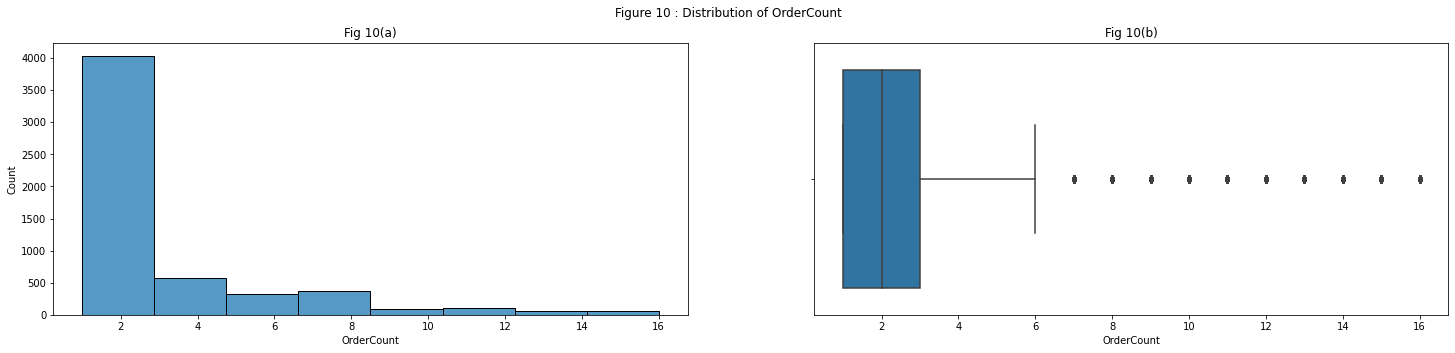

In [33]:
# Distribution of the number of orders made by the customers in last month
plot_num_var('OrderCount', 'Churn', 8, 10)

In [34]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

pd.DataFrame(df['OrderCount'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
OrderCount,5630.0,2.961812,2.879248,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,7.0,14.0,16.0


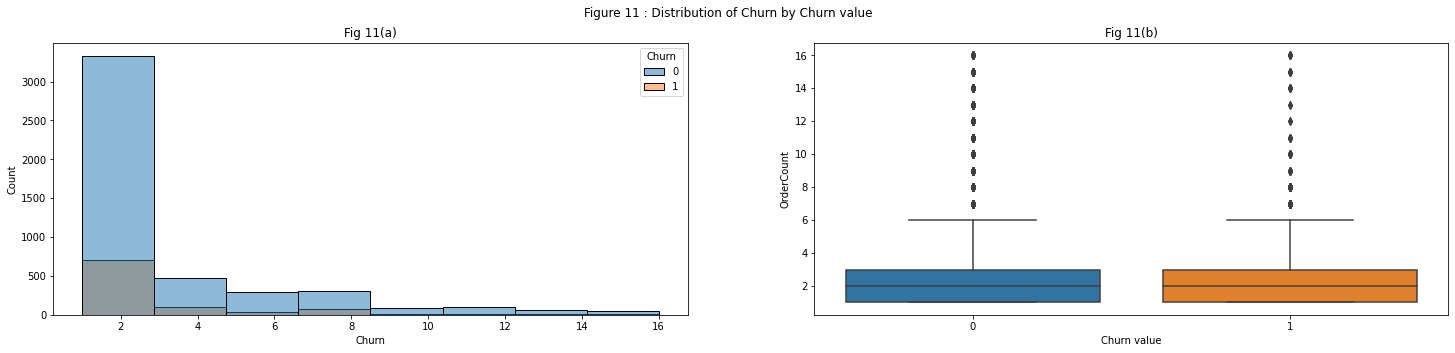

In [35]:
# Distribution of the number of orders made by the customers in last month by Churn value
plot_numvar_creditrisk('OrderCount', 'Churn', 8, 11)

In [36]:
df.groupby('Churn')['OrderCount'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,2.992952,2.897183,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,7.0,14.0,16.0
1,948.0,2.808017,2.785363,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,7.0,15.0,16.0


**OBSERVATION**:
- For most of the customers have ordered upto 3 times in the last month.
- Is right skewed.
- The mean number of orders made by customers who have churned and not-churned do not show any significant difference

Therefore, we might have to assume that OrderCount does not contribute much value for our model.

### **Day Since last order by customer : 'DaySinceLastOrder'**

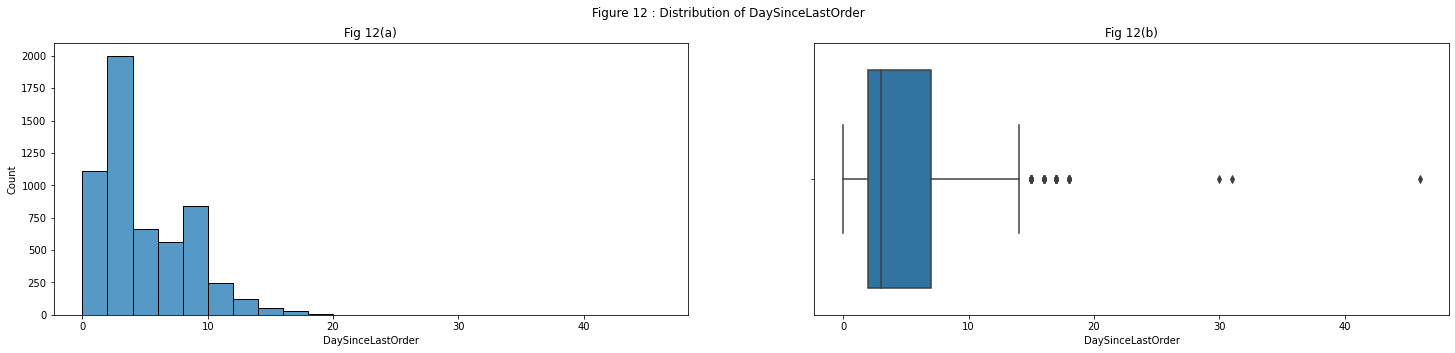

In [37]:
# Distribution of the number of days since last order 
plot_num_var('DaySinceLastOrder', 'Churn', 23, 12)

In [38]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

pd.DataFrame(df['DaySinceLastOrder'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
DaySinceLastOrder,5630.0,4.459325,3.570626,0.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,7.0,7.0,8.0,9.0,15.0,46.0


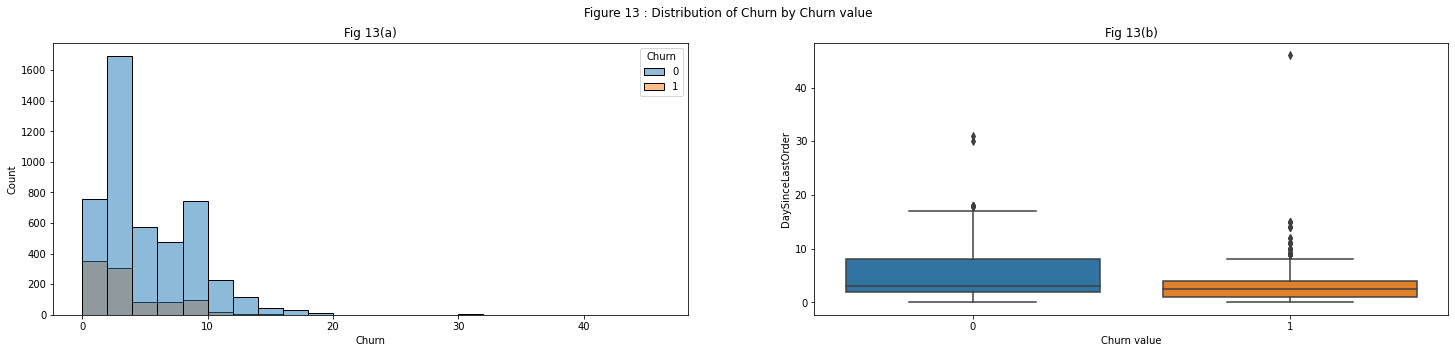

In [39]:
# Distribution of the number of days since last order by churn value
plot_numvar_creditrisk('DaySinceLastOrder', 'Churn', 23, 13)

In [40]:
df.groupby('Churn')['DaySinceLastOrder'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,4.709739,3.568374,0.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,7.0,8.0,8.0,9.0,15.0,31.0
1,948.0,3.222574,3.316790,0.0,0.0,1.0,1.0,1.0,2.0,2.5,3.0,4.0,4.0,6.0,8.0,12.0,46.0


**OBSERVATION**:
- The number of days passed since last order for most of the customers have been mostly upto 7 days.
- Is right skewed.
- The mean number of orders made by customers who have churned and not-churned do shows a significant difference

Therefore, we might have to assume that DaySinceLastOrder does contributes some value for our model.

### **Average cashback in last month : 'CashbackAmount'**

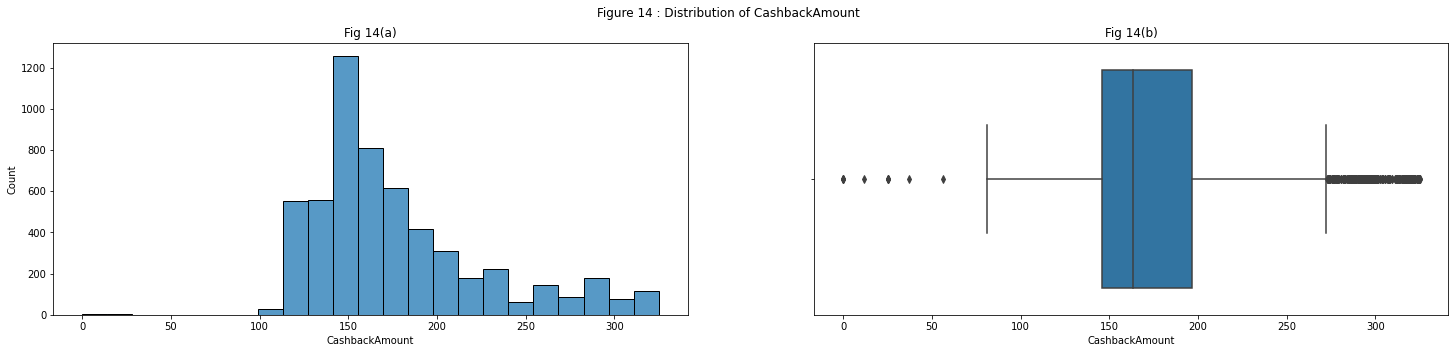

In [41]:
# Distribution of avg cashback amount in last month
plot_num_var('CashbackAmount', 'Churn', 23, 14)

In [42]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

pd.DataFrame(df['CashbackAmount'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
CashbackAmount,5630.0,177.22303,49.207036,0.0,126.86,140.804,145.77,148.334,153.654,163.28,173.066,187.09,196.3925,208.814,259.72,318.7431,324.99


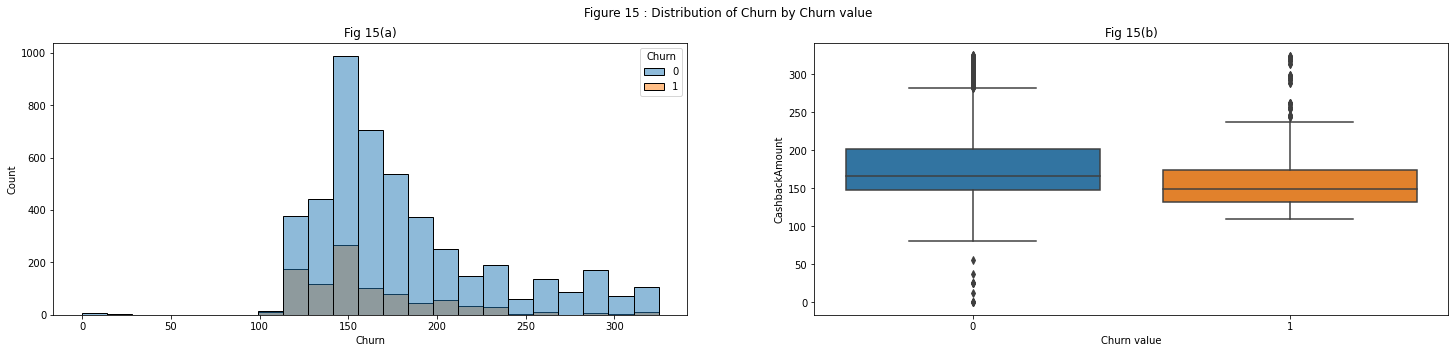

In [43]:
# Distribution of avg cashback amount in last month by churn value
plot_numvar_creditrisk('CashbackAmount', 'Churn', 23, 15)

In [44]:
df.groupby('Churn')['CashbackAmount'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,180.635203,50.434791,0.00,128.371,143.778,147.24,150.039,156.31,166.115,176.35,190.151,201.25,215.666,265.91,319.0847,324.99
1,948.0,160.370928,38.436055,110.09,123.210,127.414,132.02,139.040,146.80,149.660,154.73,167.350,174.69,185.356,212.22,306.3545,323.59


**OBSERVATION**:
- The average cashback in the last month mostly between 10 and 140 dollars.
- Outliers observed
- The mean cashback in the last month, made by customers who have churned and not-churned do show a significant difference.

Therefore, we might have to assume that CashbackAmount does contributes some value for our model.

### **Number of hours spent on mobile application : 'HourSpendOnApp'**

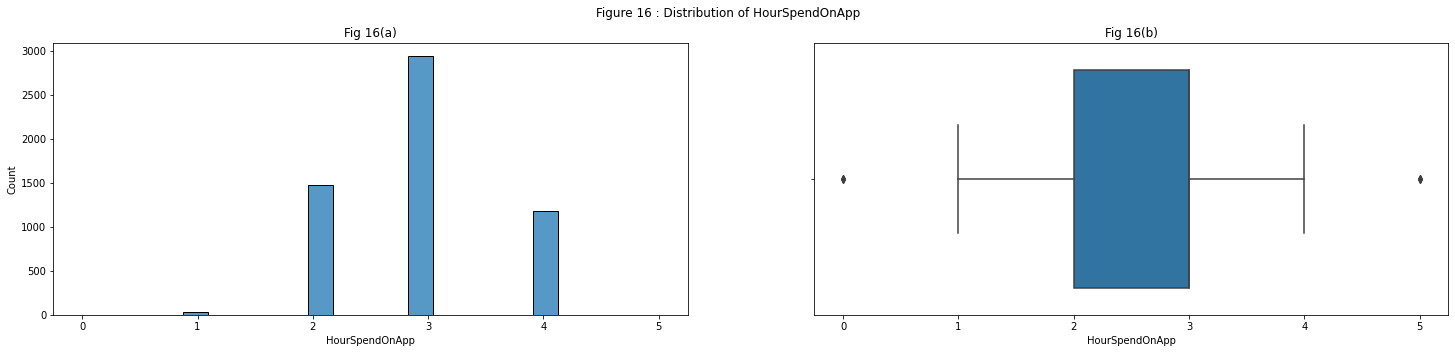

In [45]:
# Distribution of the number of hours spent by the customers on the ecommerce app
plot_num_var('HourSpendOnApp', 'Churn', 23, 16)

In [46]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

pd.DataFrame(df['HourSpendOnApp'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0


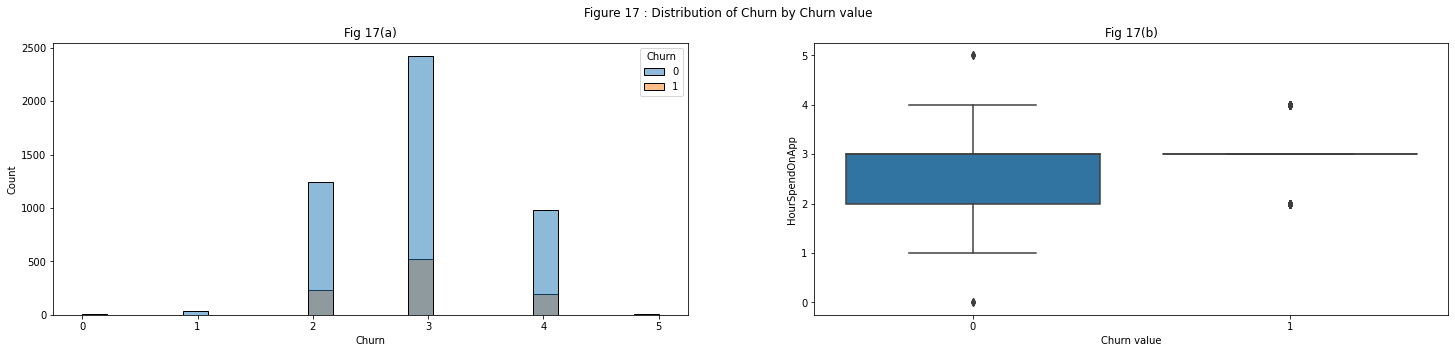

In [47]:
# Distribution of the number of hours spent by the customers on the ecommerce app by churn value
plot_numvar_creditrisk('HourSpendOnApp', 'Churn', 23, 17)

In [48]:
df.groupby('Churn')['CashbackAmount'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,180.635203,50.434791,0.00,128.371,143.778,147.24,150.039,156.31,166.115,176.35,190.151,201.25,215.666,265.91,319.0847,324.99
1,948.0,160.370928,38.436055,110.09,123.210,127.414,132.02,139.040,146.80,149.660,154.73,167.350,174.69,185.356,212.22,306.3545,323.59


**OBSERVATION**:
- The average cashback in the last month mostly between 10 and 140 dollars.
- Outliers observed
- The mean cashback in the last month, made by customers who have churned and not-churned do show a significant difference.

Therefore, we might have to assume that CashbackAmount does contributes some value for our model.

### **Total number of deceives is registered on particular customer : 'NumberOfDeviceRegistered'**

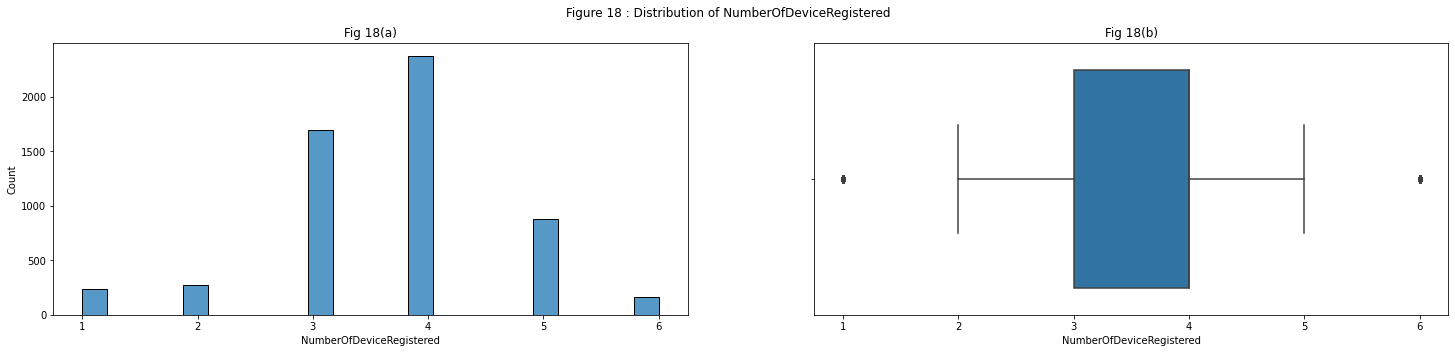

In [49]:
# Distribution of the number of devices registered on the ecommerce app
plot_num_var('NumberOfDeviceRegistered', 'Churn', 23, 18)

In [50]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

pd.DataFrame(df['NumberOfDeviceRegistered'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,6.0,6.0


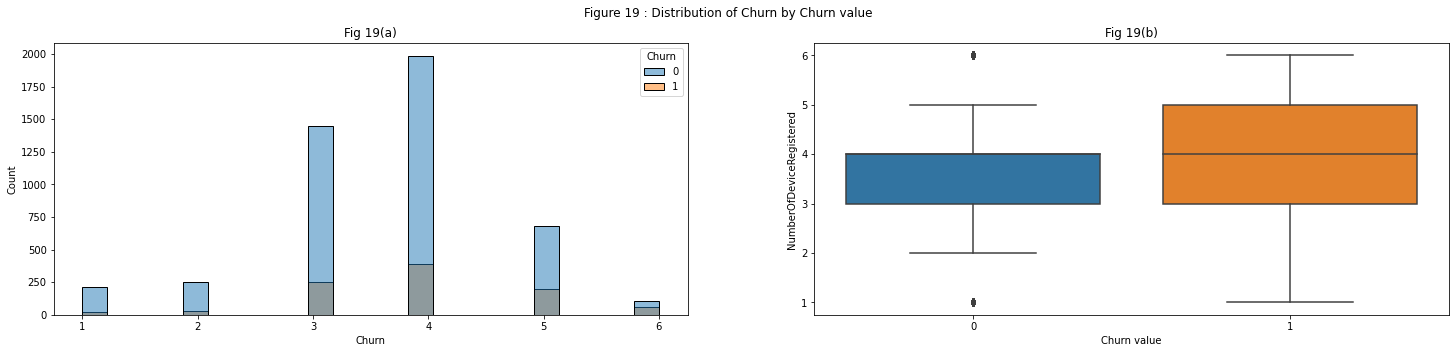

In [51]:
# Distribution of the number of devices registered on the ecommerce app by churn value
plot_numvar_creditrisk('NumberOfDeviceRegistered', 'Churn', 23, 19)

In [52]:
df.groupby('Churn')['NumberOfDeviceRegistered'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,3.639257,1.018910,1.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,6.0,6.0
1,948.0,3.934599,1.014127,1.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,6.0,6.0


**OBSERVATION**:
- Maority of the customers have 3 to 4 devices registered with the app.

### **Total number of addresses added on particular customer : 'NumberOfAddress'**

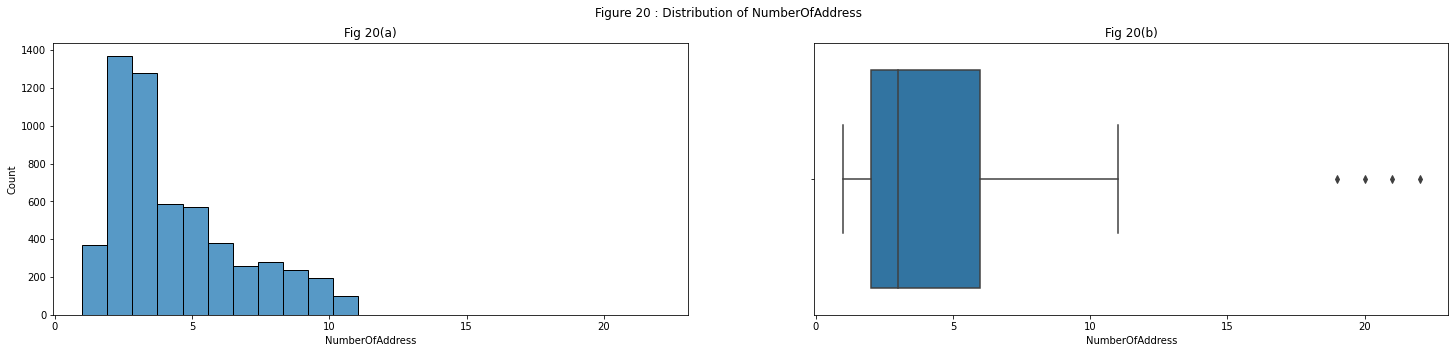

In [53]:
# Distribution of the number of addresses added by the customers on the ecommerce app
plot_num_var('NumberOfAddress', 'Churn', 23, 20)

In [54]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

pd.DataFrame(df['NumberOfAddress'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,5.0,6.0,6.0,8.0,11.0,22.0


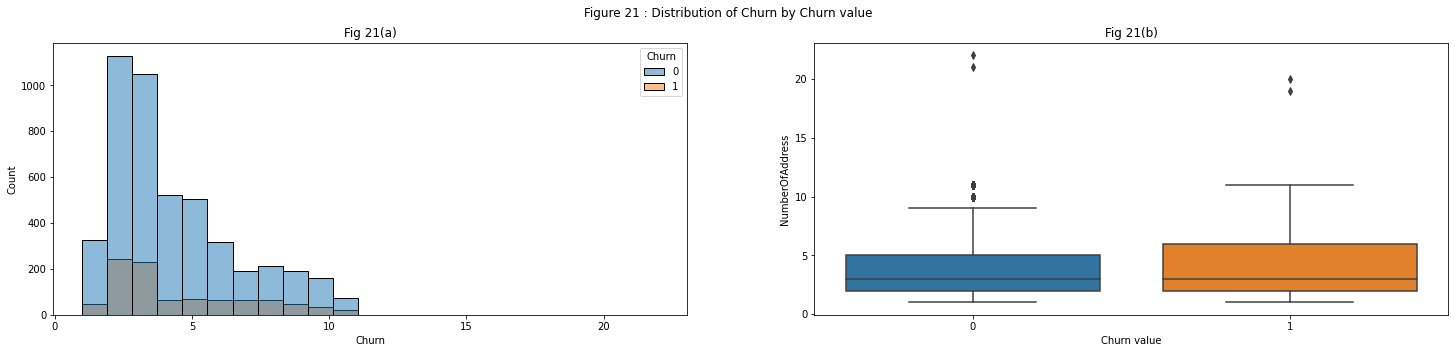

In [55]:
# Distribution of the number of addresses of the customers added on the ecommerce app by churn value
plot_numvar_creditrisk('NumberOfAddress', 'Churn', 23, 21)

In [56]:
df.groupby('Churn')['NumberOfAddress'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,4.162965,2.537001,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,5.0,5.0,6.0,8.0,11.0,22.0
1,948.0,4.466245,2.790071,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,6.0,6.0,7.0,9.0,11.0,20.0


**OBSERVATION**:
- Majority of the customers have  or 3 addresses added with the app
- Outliers observed.
- The mean number of addresses for the customers who have churned and not-churned do not show a significant difference.

Therefore, we might have to assume that NumberOfAddress does not contributes much value for our model.

## **Categorical features**

### **Functions**

In [57]:
def plotting_percentages(df, col, target, fig_num, x_labels):
    x, y = col, target
    
    # Temporary dataframe with percentage values
    temp_df = df.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    #order_list = list(df[col].unique())
    #order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent', hue=y,kind='bar', data=temp_df, height=6, aspect=3)
    g.ax.set_xticklabels(x_labels)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'Figure {fig_num}(b) : {col.title()} By Percent {target.title()}')
    plt.xlabel(f'{col.title()}')
               
    plt.ylabel(f'{target.title()} Percentage', 
               fontdict={'fontsize': 20})
    return g

In [58]:
def chisq_test(df, cat_var):
    # Creating an empty list of final selected predictors
    #SelectedPredictors=[]

    CrossTabResult=pd.crosstab(index=df['credit_risk'], columns=df[cat_var])
    ChiSqResult = chi2_contingency(CrossTabResult)
        
    # If the ChiSq P-Value is <0.05, that means we reject H0
    if (ChiSqResult[1] < 0.05):
        print('P-Value :', ChiSqResult[1])
        print('\'',cat_var,'\' IS CORRELATED with \'credit_risk\'')
    else:
        print('P-Value :', ChiSqResult[1])
        print(f'\'{cat_var}\' IS NOT CORRELATED with credit_risk')        
            

### **Preferred login device of customer : 'PreferredLoginDevice'**



In [59]:
df['PreferredLoginDevice'].unique()

array(['Mobile', 'Computer'], dtype=object)

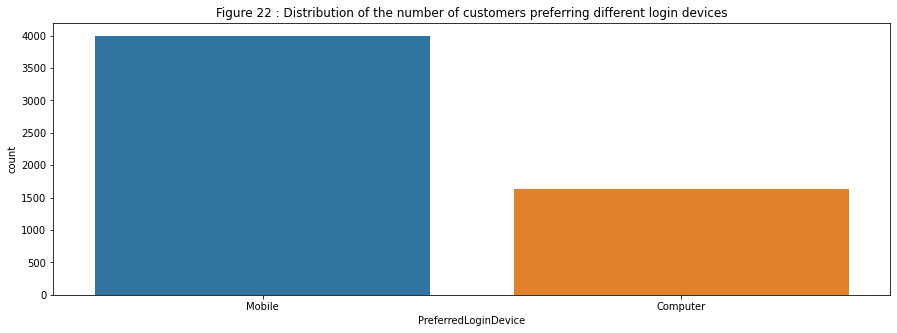

In [60]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferredLoginDevice', data=df)
plt.title('Figure 22 : Distribution of the number of customers preferring different login devices')
plt.show()

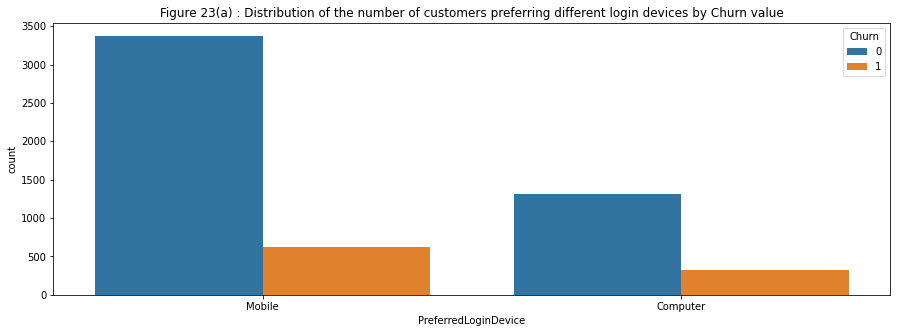

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.5.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manage

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manage

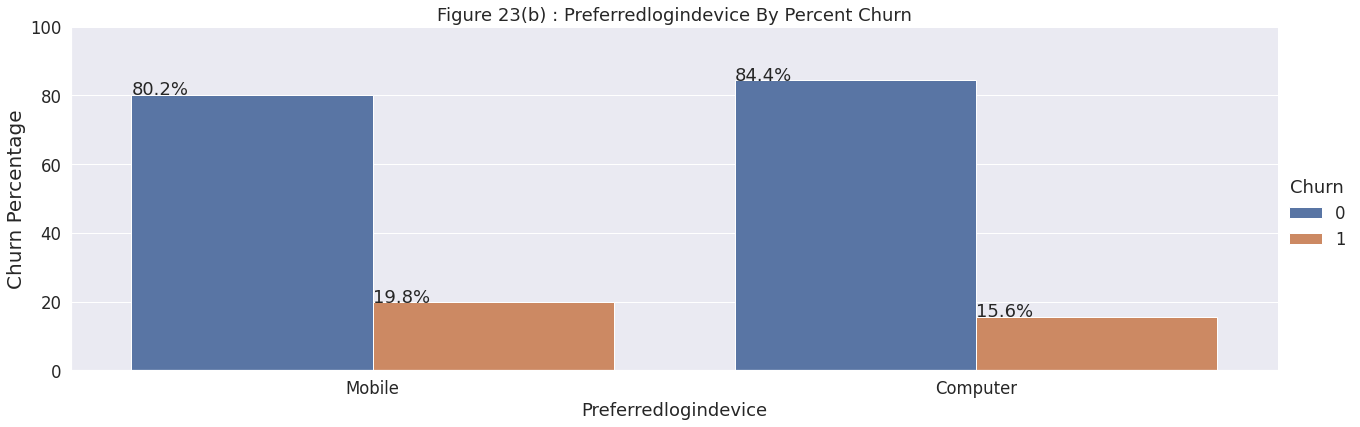

In [61]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df)
plt.title('Figure 23(a) : Distribution of the number of customers preferring different login devices by Churn value')
plt.show()

plotting_percentages(df, 'PreferredLoginDevice', 'Churn', 23, df.PreferredLoginDevice.unique())

**OBSERVATIONS :**
- Majority of the customers prefer mobile phones for logging into the ecommerce app.
- When categorized based on Churn value, while observing the percentage plot, the proportion of customers who have churned and not churned is almost similar for all categories under Preferredlogindevice.

It might be safe to assume that Preferredlogindevice might NOT be a good predictor variable for our model.

### **Tier type of the city the customer is living in : 'CityTier'**



In [62]:
df['CityTier'].unique()

array([3, 1, 2])

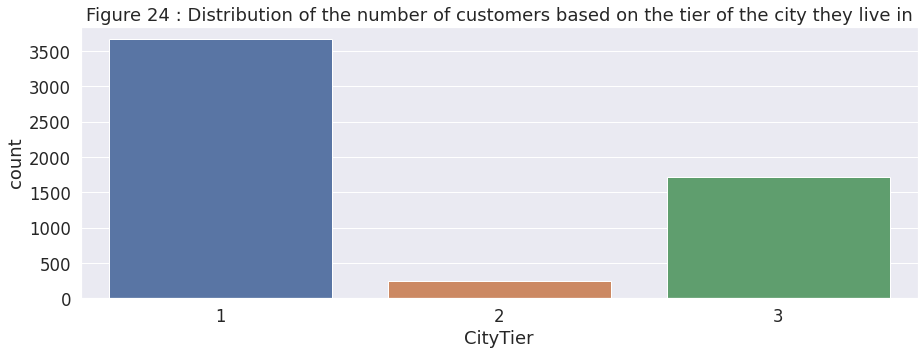

In [63]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='CityTier', data=df)
plt.title('Figure 24 : Distribution of the number of customers based on the tier of the city they live in')
plt.show()

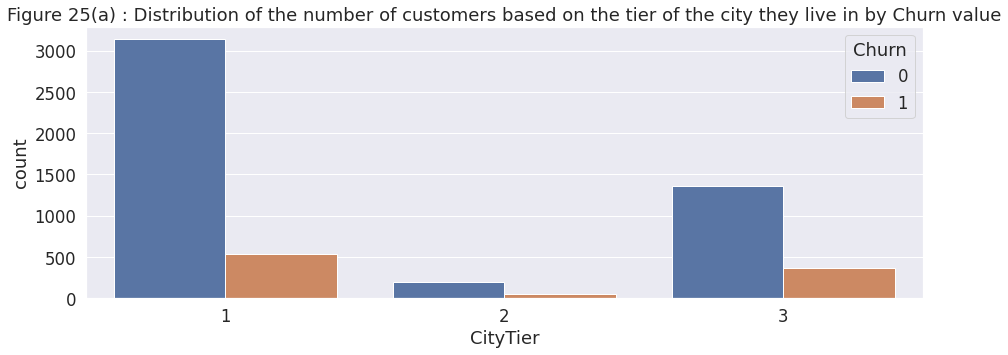

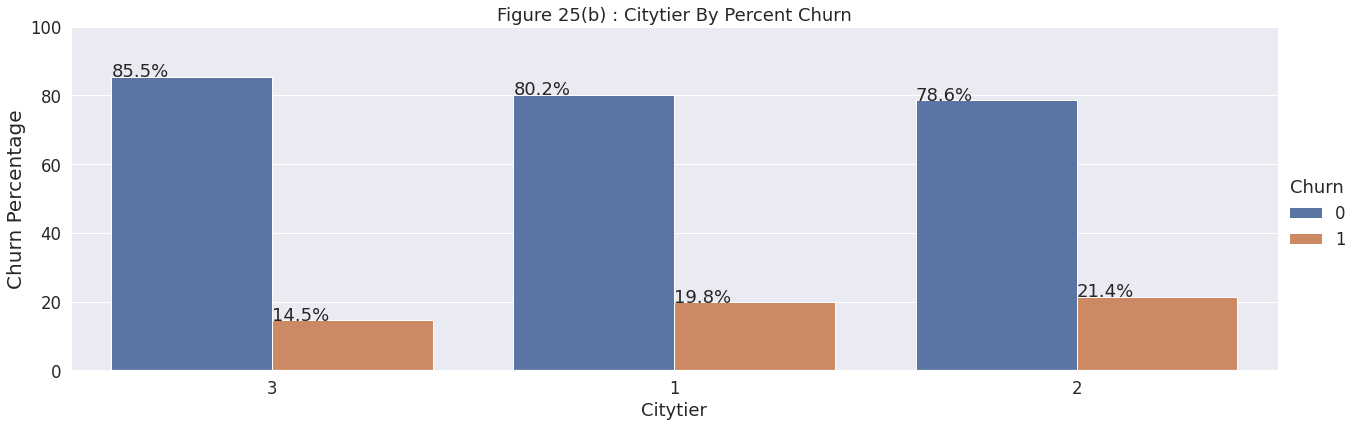

In [64]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='CityTier', hue='Churn', data=df)
plt.title('Figure 25(a) : Distribution of the number of customers based on the tier of the city they live in by Churn value')
plt.show()

plotting_percentages(df, 'CityTier', 'Churn', 25, df.CityTier.unique())

**OBSERVATIONS :**
- Majority of the customers live in Tier 1 city, the least in Tier 2.
- When categorized based on Churn value, while observing the percentage plot, we see that the percentage of customers who churned were lesser in Tier 3 cities than others.

We shall assume that CityTier might prove be a good predictor variable for our model.

### **Preferred payment method of customer : 'PreferredPaymentMode'**



In [65]:
df['PreferredPaymentMode'].unique()

array(['DC', 'UPI', 'CC', 'COD', 'E wallet'], dtype=object)

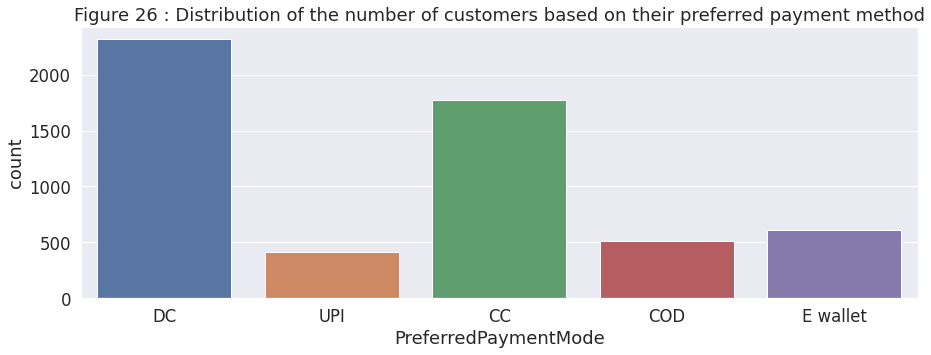

In [66]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferredPaymentMode', data=df)
plt.title('Figure 26 : Distribution of the number of customers based on their preferred payment method')
plt.show()

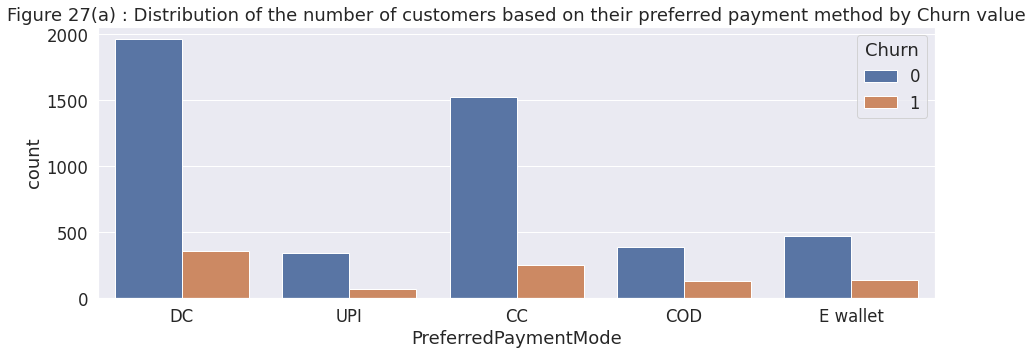

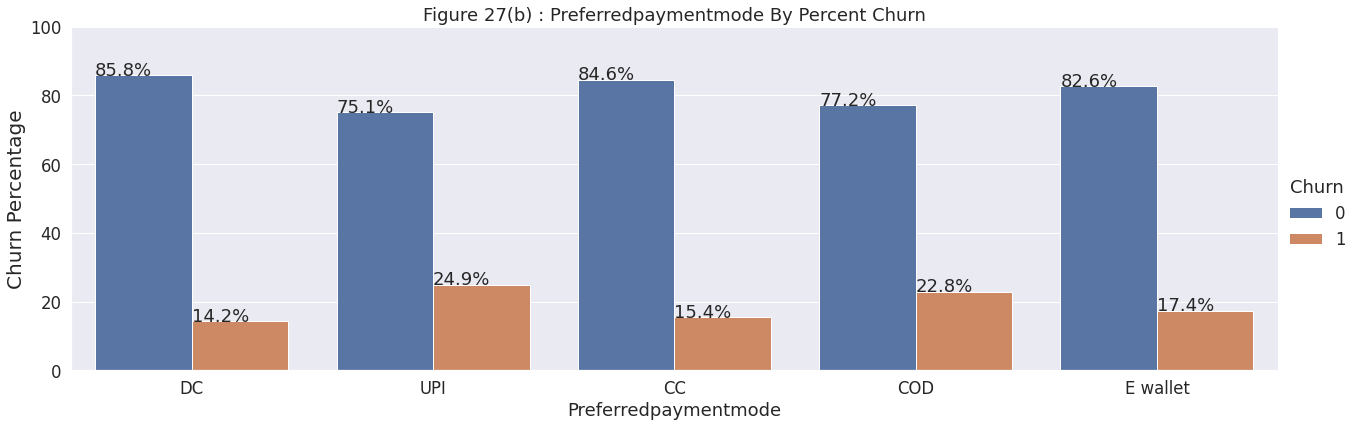

In [67]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df)
plt.title('Figure 27(a) : Distribution of the number of customers based on their preferred payment method by Churn value')
plt.show()

plotting_percentages(df, 'PreferredPaymentMode', 'Churn', 27, df.PreferredPaymentMode.unique())

**OBSERVATIONS :**
- Majority of the customers prefer debit cards or credit cards for their payment.
- When categorized based on Churn value, while observing the percentage plot, we see that the percentage of customers who churned were lesser in customers who used debit and credit cards compared to other modes.

We shall assume that Preferredpaymentmode might prove be a good predictor variable for our model.

### **Gender of customer : 'Gender'**

In [68]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [69]:
df['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

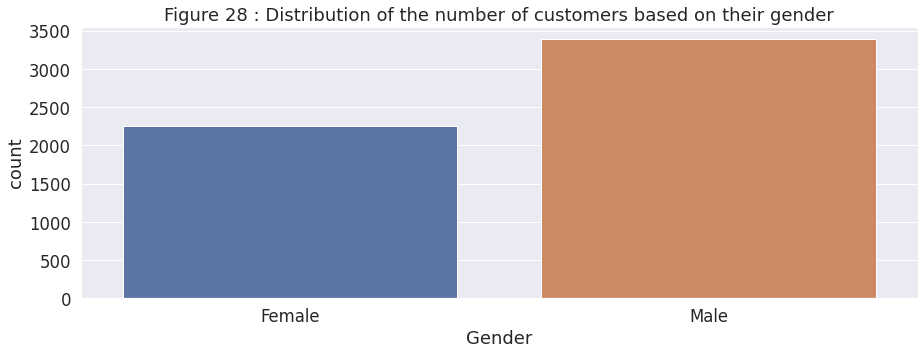

In [70]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Gender', data=df)
plt.title('Figure 28 : Distribution of the number of customers based on their gender')
plt.show()

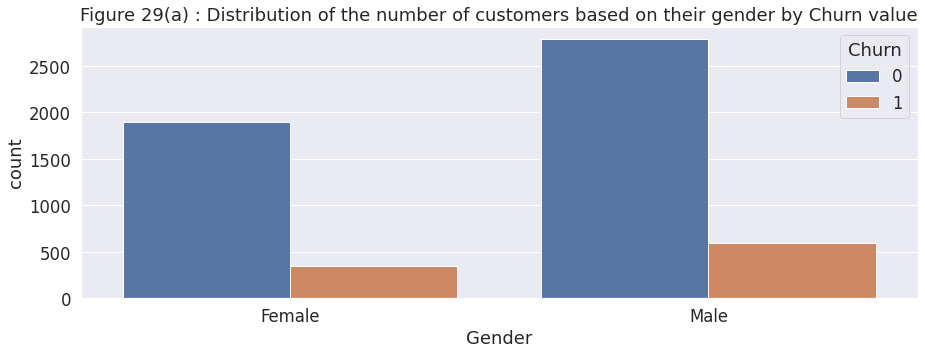

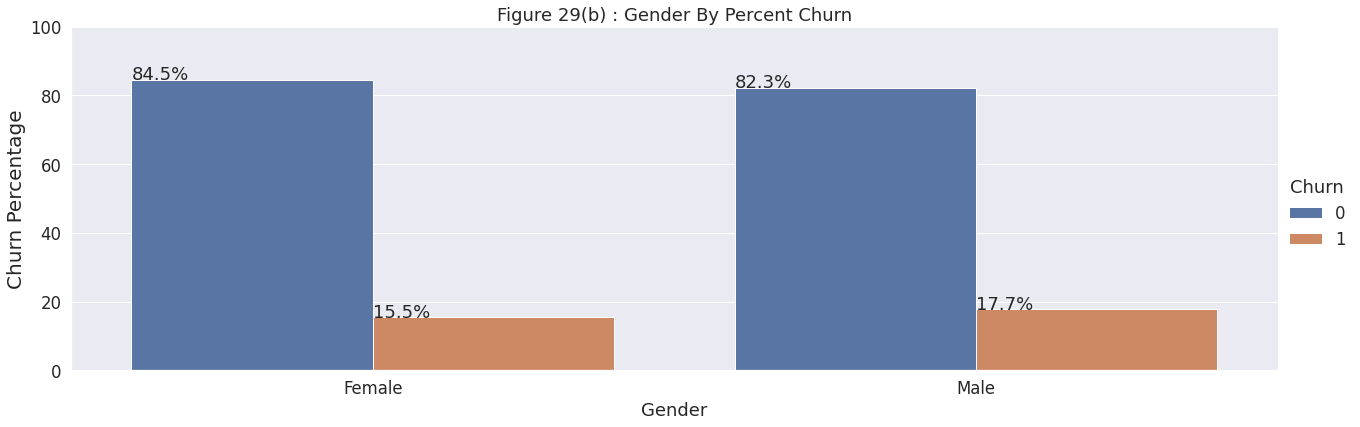

In [71]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Figure 29(a) : Distribution of the number of customers based on their gender by Churn value')
plt.show()

plotting_percentages(df, 'Gender', 'Churn', 29, df.Gender.unique())

**OBSERVATIONS :**
- There are more male customers than females.
- When categorized based on Churn value, while observing the percentage plot, we see that the percentage of customers who churned were almost at similar levels among both males and females.

We shall assume that Gender might not be a good predictor variable for our model.

### **Preferred order category of customer in last month : 'PreferedOrderCat'**



In [72]:
df['PreferedOrderCat'].unique()

array(['Laptop', 'Mobile', 'Others', 'Fashion', 'Grocery'], dtype=object)

In [73]:
df.PreferedOrderCat.value_counts()

Mobile     2080
Laptop     2050
Fashion     826
Grocery     410
Others      264
Name: PreferedOrderCat, dtype: int64

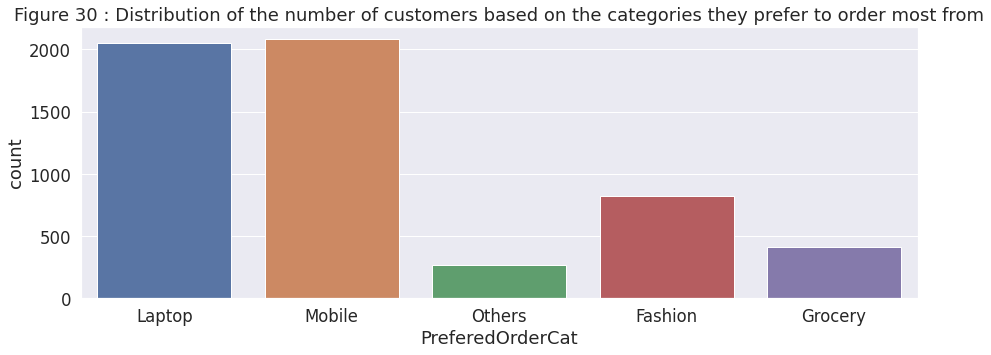

In [74]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferedOrderCat', data=df)
plt.title('Figure 30 : Distribution of the number of customers based on the categories they prefer to order most from')
plt.show()

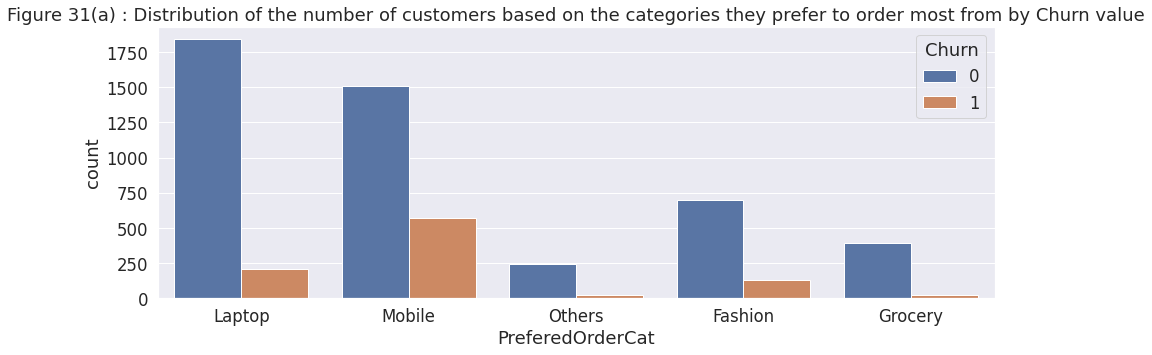

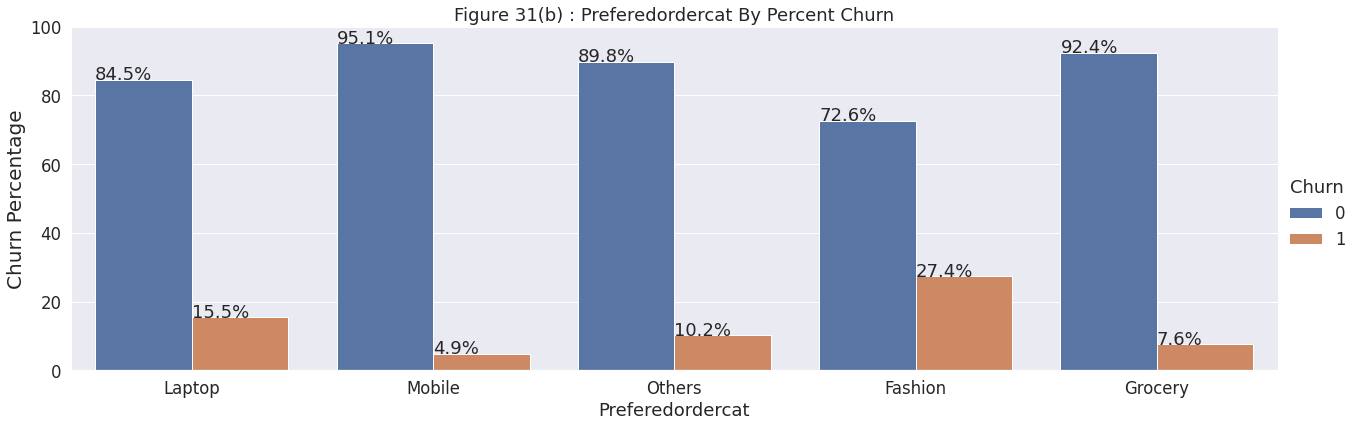

In [75]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferedOrderCat', hue='Churn', data=df)
plt.title('Figure 31(a) : Distribution of the number of customers based on the categories they prefer to order most from by Churn value')
plt.show()

plotting_percentages(df, 'PreferedOrderCat', 'Churn', 31, df.PreferedOrderCat.unique())

**OBSERVATIONS :**
- Majority of the customers have made most of their orders either in the laptop or mobile categories.
- When categorized based on Churn value, while observing the percentage plot, we see that the customers who have ordered the most from the fashion category have churned the most, while the least churned ordered under Mobile followed closely by Grocery.
There is definitely a difference in the churn percentages across the different categories.

Therefore,we shall assume that Preferredordercat might prove be a good predictor variable for our model.

### **Satisfactory score of customer on service : 'SatisfactionScore'**



In [76]:
df['SatisfactionScore'].unique()

array([2, 3, 5, 4, 1])

In [77]:
df.SatisfactionScore.value_counts()

3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64

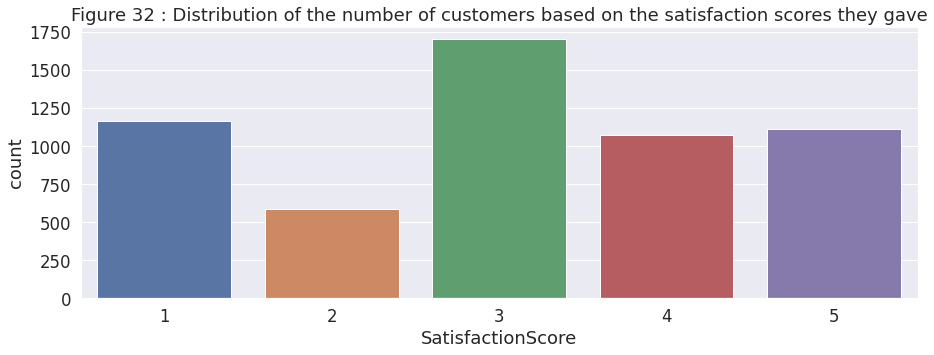

In [78]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='SatisfactionScore', data=df)
plt.title('Figure 32 : Distribution of the number of customers based on the satisfaction scores they gave')
plt.show()

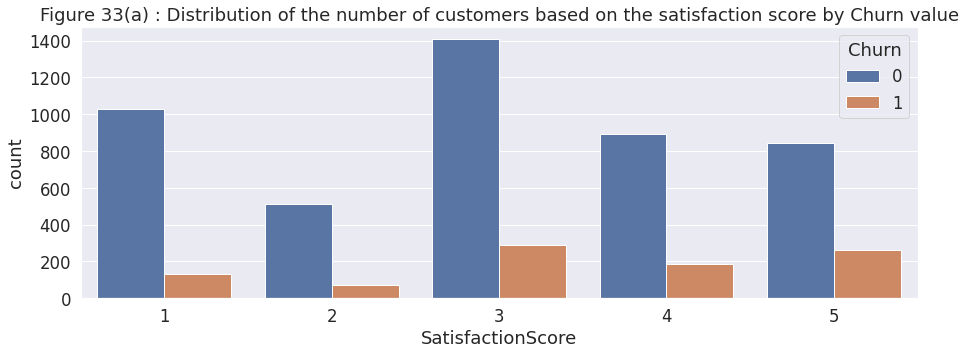

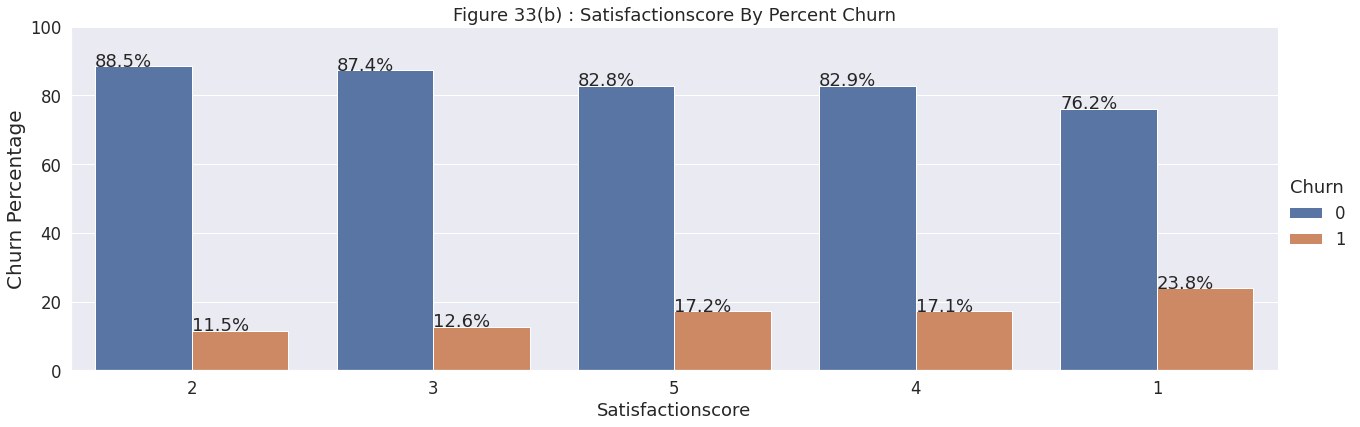

In [79]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='SatisfactionScore', hue='Churn', data=df)
plt.title('Figure 33(a) : Distribution of the number of customers based on the satisfaction score by Churn value')
plt.show()

plotting_percentages(df, 'SatisfactionScore', 'Churn', 33, df.SatisfactionScore.unique())

**OBSERVATIONS :**
- Most of the customers have awarded an average satisfaction score(3), followed by good scores(4,5 combined) and then bad scores(1,2 combined)
- The least given score is 2
- When categorized based on Churn value, while observing the percentage plot, we see that customers that have given a score of 1 have highest churn % (which is understandable), while it it interesting to note that customers who have given good scores(4,,5) also have churned(nect to 1) out considerably more than what we would expect. 
- It is again interesting to note that while the least number of customers have awarded a score of 2 the chhurn % is also the lowest of the five scores

There is definitely a difference in the churn percentages across the different categories.

Therefore,we shall assume that SatisfactionScore might prove be a good predictor variable for our model.

### **Marital status of customer : 'MaritalStatus'**



In [80]:
df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [81]:
df.MaritalStatus.value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

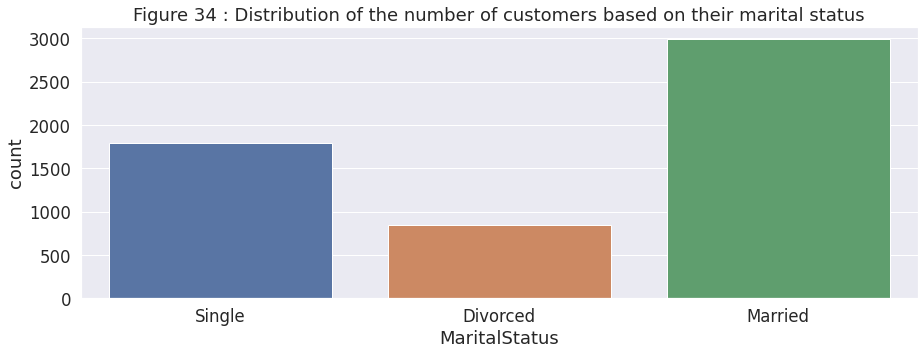

In [82]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='MaritalStatus', data=df)
plt.title('Figure 34 : Distribution of the number of customers based on their marital status')
plt.show()

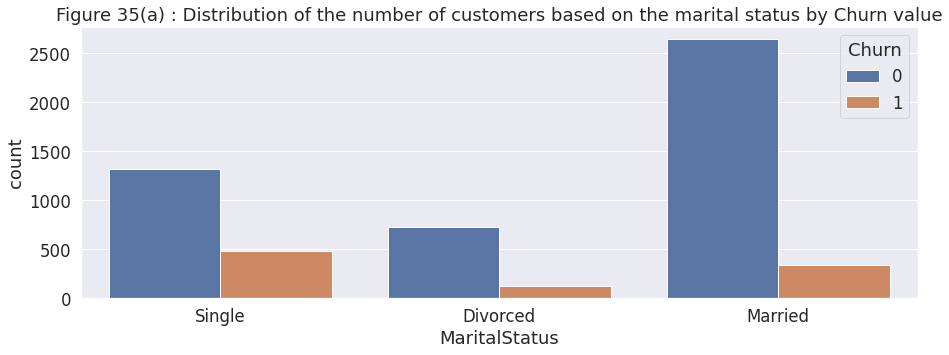

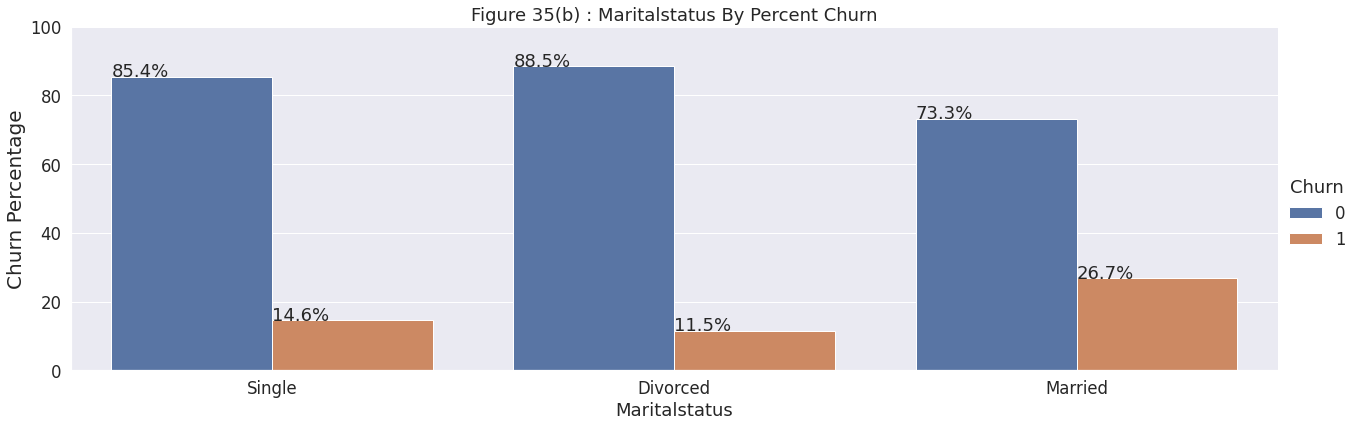

In [83]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='MaritalStatus', hue='Churn', data=df)
plt.title('Figure 35(a) : Distribution of the number of customers based on the marital status by Churn value')
plt.show()

plotting_percentages(df, 'MaritalStatus', 'Churn', 35, df.MaritalStatus.unique())

**OBSERVATIONS :**
- Maority of the customers are married
- When categorized based on Churn value, while observing the percentage plot, we see that married customers churn out the most.

There is definitely a difference in the churn percentages across the different categories.

Therefore,we shall assume that MaritalStatus might prove be a good predictor variable for our model.

### **Any complaint has been raised in last month : 'Complain'**



In [84]:
df['Complain'].unique()

array([1, 0])

In [85]:
df.Complain.value_counts()

0    4026
1    1604
Name: Complain, dtype: int64

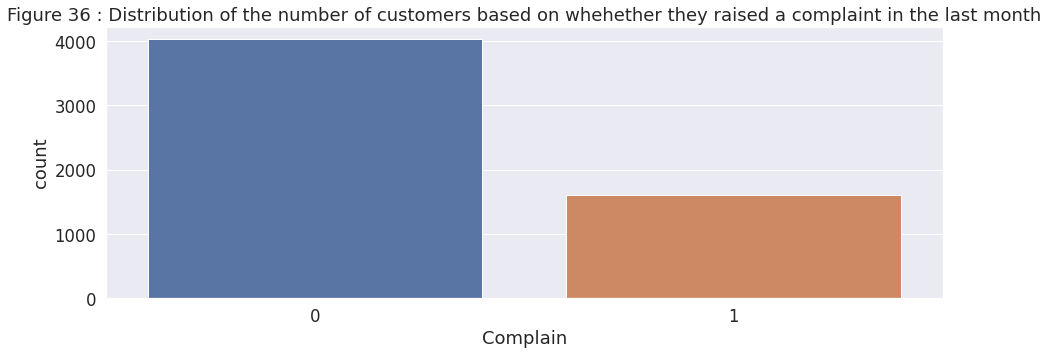

In [86]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Complain', data=df)
plt.title('Figure 36 : Distribution of the number of customers based on whehether they raised a complaint in the last month')
plt.show()

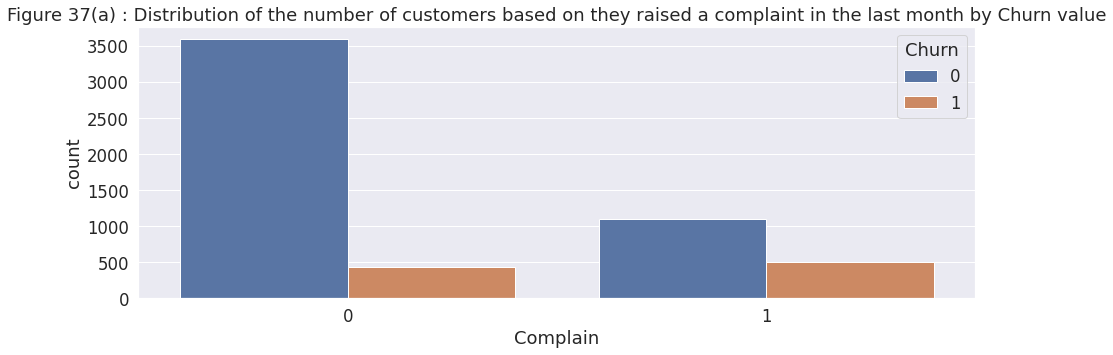

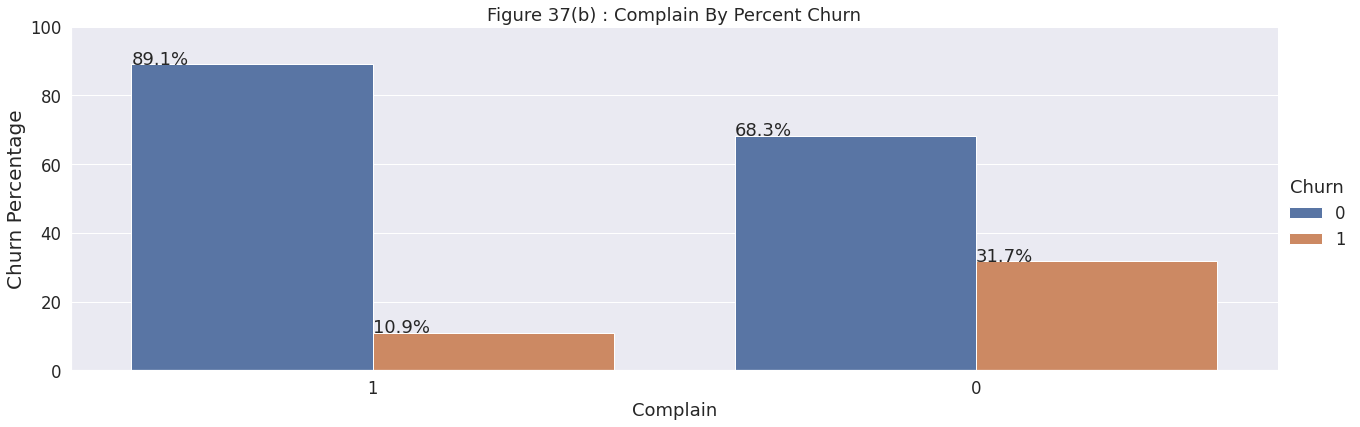

In [87]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Complain', hue='Churn', data=df)
plt.title('Figure 37(a) : Distribution of the number of customers based on they raised a complaint in the last month by Churn value')
plt.show()

plotting_percentages(df, 'Complain', 'Churn', 37, df.Complain.unique())

**OBSERVATIONS :**
- No. of cutomers who raised a complaint in the last month are lesser than those who have not.
- When categorized based on Churn value, while observing the percentage plot, we see that customers who have complained in the last month have churned out lesser compared to those who did not.

There is definitely a difference in the churn percentages across the different categories.

Therefore,we shall assume that Complain might prove be a good predictor variable for our model.

In [88]:
logger.info('Data exploration ends!')

INFO:root:Data exploration ends!


In [89]:
logger.info('FILE ENDS RUNNING!')

INFO:root:FILE ENDS RUNNING!
